# 🌟 Логистическая регрессия и SVM: Введение

<p style="font-size:20px;">Как врач решает, отправлять ли пациента на биопсию?</p>


<img src="images/doctor_decision.png" alt="Doctor Decision" width="400" height="400">


# 🎯 Цели урока

- 🧠 **понять** логистическую регрессию и SVM

- 💻 **увидеть**, как они работают в коде

- 📊 **научиться** читать метрики и избегать типичных ошибок

# 📚 Содержание

1. Постановка задачи бинарной классификации

2. Логистическая регрессия

    - Интуиция: линейная комбинация признаков $\to$ вероятность через $\sigma$

    - Формула сигмоиды; log‑loss; градиенты

3. SVM

    - Геометрия максимального отступа

    - Жёсткий vs мягкий отступ; роль $C$

    - Ядровой (kernel) трюк

4. Практика

    - Реализация логистической регрессии и SVM

    - Метрики качества: accuracy, precision, recall, F1

    - Сравнение логистической регрессии и SVM


---

# Задача бинарной классификации

## Что такое бинарная классификация?

### Данные

Рассматриваем обучающую выборку

$$
  \mathcal D=\{(\mathbf x^{(i)},\; y^{(i)})\}_{i=1}^{N},
$$

где $\mathbf x^{(i)}\in\mathbb R^{d}$ — вектор признаков объекта,
а метка $y^{(i)}\in\{0,1\}$ указывает его принадлежность к одному из двух классов.

### Модель $f(\mathbf x)$

Строим функцию $f:\mathbb R^{d}\to[0,1]$, которая для каждого объекта возвращает оценку $f(\mathbf x)=P(y=1\mid\mathbf x)$ — _«насколько объект похож на класс 1»_.

### Решающее правило

Чтобы превратить вероятностный вывод в окончательный ярлык, задаём порог $\tau\in(0,1)$:

$$
  \hat y=\begin{cases}
    1,& f(\mathbf x)\ge\tau,\\[2pt]
    0,& f(\mathbf x)<\tau.
  \end{cases}
$$

Значение $\tau$ выбирают из соображений задачи: выше порог — меньше ложных тревог, ниже — меньше пропущенных случаев.


## Как оценивать качество модели бинарной классификации?

### TP, TN, FP, FN

- **True Positive (TP)**: Верно положительные — количество объектов, которые действительно принадлежат классу 1 и были классифицированы как класс 1.
- **True Negative (TN)**: Верно отрицательные — количество объектов, которые действительно принадлежат классу 0 и были классифицированы как класс 0.
- **False Positive (FP)**: Ложно положительные — количество объектов, которые действительно принадлежат классу 0, но были классифицированы как класс 1.
- **False Negative (FN)**: Ложно отрицательные — количество объектов, которые действительно принадлежат классу 1, но были классифицированы как класс 0.


### Матрица ошибок

- Матрица ошибок (confusion matrix) — это таблица, которая показывает количество TP, TN, FP и FN для модели:

    |               | Предсказано 1 | Предсказано 0 |
    |---------------|---------------|---------------|
    | **Истинно 1** | TP            | FN            |
    | **Истинно 0** | FP            | TN            |


### Accuracy

- **Accuracy**: Доля верно классифицированных объектов (как положительных, так и отрицательных) от общего числа объектов:

    $$
      \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}.
    $$

- Существует риск, что accuracy будет высока даже при плохой классификации, если классы несбалансированы. В таком случае можно использовать **Balanced Accuracy**:

    $$
      \text{Balanced Accuracy} = \frac{1}{2}(\text{TPR} + \text{TNR}),
    $$

    где **TPR (True Positive Rate)** и **TNR (True Negative Rate)** — это доли верно классифицированных положительных и отрицательных классов соответственно:

    $$
      \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad
      \text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}.
    $$


### Precision, Recall, F1-score

- **Precision** (точность): Доля верно классифицированных положительных объектов от всех объектов, классифицированных как положительные:

    $$
      \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}.
    $$

- **Recall** (полнота): Доля верно классифицированных положительных объектов от всех объектов, принадлежащих классу 1:

    $$
      \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}.
    $$

- **F1-score**: Гармоническое среднее между precision и recall:

    $$
      \text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}.
    $$


### ROC-кривая и AUC

_Подробное объяснение выходит за рамки данного занятия._

- **ROC** (Receiver Operating Characteristic): график TPR (= Recall) против FPR $(\text{FP}/(\text{FP}+\text{TN}))$ при изменении порога $\tau$.

- **AUC‑ROC** — площадь под ROC; от 0.5 (случайно) до 1 (идеально).


### PR‑кривая и AUC

_Подробное объяснение выходит за рамки данного занятия._

- **Precision‑Recall curve**: Precision vs Recall при всех значениях $\tau$.

- **AUC‑PR** особенно информативен при сильном дисбалансе классов.


### Когда какую метрику выбирать?

_Подробное объяснение выходит за рамки данного занятия._

- Медицина → важен Recall (не пропустить болезнь) и AUC‑ROC.
- Поиск аномалий / спам‑фильтр → важен Precision, смотрят PR‑кривую.
- Общий баланс → $F_1$ или balanced accuracy.


---

# Логистическая регрессия

## Интуиция

- Нам нужно построить модель, которая принимает на вход вектор признаков $\mathbf x$ и выдает вероятность принадлежности к классу 1: 

    $$
      p_+ = P(y=1 \mid \mathbf x) \in [0, 1]
    $$

- Мы умеем строить линейные модели, которые принимают на вход вектор признаков $\mathbf x$ и выдают действительное число

    $$
      \mathbf w^\top \mathbf x \in \mathbb{R}
    $$

- Как преобразовать число $\mathbb{R}$ в вероятность $p_+ \in [0, 1]$?

## Сигмоида

Решим задачу обратным путем: как из вероятности $p_+ \in [0, 1]$ получить число $\mathbb{R}$?

$$
  \log\left(\frac{p_+}{1 - p_+}\right) \in \mathbb{R}
$$

Далее мы можем из числа $\mathbb{R}$ перейти к $\mathbb{R}^+$:

$$
  \exp\left(\log\left(\frac{p_+}{1 - p_+}\right)\right) = \exp\left(\mathbf w^\top \mathbf x\right) \in \mathbb{R}^+
$$

Таким образом, мы можем получить любое положительное действительное число из вероятности $p_+$ с помощью экспоненциальной функции.

Теперь мы можем выразить вероятность $p_+$ через $\mathbf w^\top \mathbf x$:

$$
  p_+ = \frac{1}{1 + \exp\left(-\mathbf w^\top \mathbf x\right)} = \sigma\left(\mathbf w^\top \mathbf x\right)
$$

Так мы получили **функцию сигмоиды $\sigma(z)$**, которая преобразует любое действительное число $z$ в вероятность $p_+ \in [0, 1]$:

$$
  \sigma(z) = \frac{1}{1 + \exp(-z)}.
$$

<img src="images/sigmoid.png" alt="Sigmoid" height="400">


## Максимизация правдоподобия

- Для пары $(\mathbf x^{(i)}, y^{(i)})$, где $y^{(i)} \in \{0, 1\}$ и

    $$
      z^{(i)} = \mathbf w^\top \mathbf x^{(i)}, \quad \sigma(z) = \frac{1}{1 + \exp(-z)},
    $$

    мы можем записать правдоподобие как:

    $$
      P(y^{(i)} \mid \mathbf x^{(i)}, \mathbf w) = \sigma(z^{(i)})^{y^{(i)}} (1 - \sigma(z^{(i)}))^{1 - y^{(i)}}
    $$

- Для всей выборки $\mathcal D = \{(\mathbf x^{(i)}, y^{(i)})\}_{i=1}^N$ правдоподобие будет:

$$
  P(\mathcal D \mid \mathbf w) = \prod_{i=1}^N P(y^{(i)} \mid \mathbf x^{(i)}, \mathbf w) = \prod_{i=1}^N \sigma(z^{(i)})^{y^{(i)}} (1 - \sigma(z^{(i)}))^{1 - y^{(i)}}
$$

- Чтобы максимизировать правдоподобие, мы можем взять логарифм:

$$
  \log P(\mathcal D \mid \mathbf w) = \sum_{i=1}^N \left( y^{(i)} \log(\sigma(z^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(z^{(i)})) \right)
$$

## Log‑loss

- Отрицая и усредняя логарифм правдоподобия, мы получаем функцию потерь (log‑loss):

    $$
      \mathcal L(\mathbf w) = - \frac{1}{N} \log P(\mathcal D \mid \mathbf w) = - \frac{1}{N} \sum_{i=1}^N \left( y^{(i)} \log(\sigma(z^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(z^{(i)})) \right)
    $$


## Градиент Log‑loss

Градиент log‑loss по весам $\mathbf w$ будет:

$$
  \nabla_{\mathbf w} \mathcal L(\mathbf w) = \frac{1}{N} \sum_{i=1}^N \left( \sigma(z^{(i)}) - y^{(i)} \right) \mathbf x^{(i)}
$$

---

# SVM

## Геометрия максимального отступа

Рассматриваем обучающую выборку

$$
  \mathcal D=\{(\mathbf x^{(i)},\; y^{(i)})\}_{i=1}^{N}
$$

где $\mathbf x^{(i)}\in\mathbb R^{d}$ — вектор признаков объекта,
а метка $y^{(i)}\in\{+1, -1\}$ указывает его принадлежность к одному из двух классов.

**Обратите внимание:** для SVM метки классов принимают значения $+1$ и $-1$, а не $0$ и $1$.

Мы хотим найти гиперплоскость:

$$
  H:\; \mathbf w^\top \mathbf x - b = 0
$$

такую, что:

- объекты класса $+1$ лежат по одну сторону от гиперплоскости: 

    $$
      \mathbf w^\top \mathbf x^{(i)} - b \geq 0 \quad \forall y^{(i)} = +1
    $$

- объекты класса $-1$ лежат по другую сторону от гиперплоскости:

    $$
      \mathbf w^\top \mathbf x^{(i)} - b \leq 0 \quad \forall y^{(i)} = -1
    $$

**Отступ (margin)** от гиперплоскости до объекта $\mathbf x^{(i)}$ определяется как:

$$
  M^{(i)} = \frac{y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b)}{\|\mathbf w\|}
$$

Чем больше отступ, тем лучше модель.

**Геометрический отступ всей модели** определяется как:

$$
  \gamma = \min_{i} M^{(i)} = \min_{i} \frac{y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b)}{\|\mathbf w\|}
$$

Именно эту величину мы хотим **максимизировать**:

$$
  \max_{\mathbf w,b}\;\gamma
  \quad\Longleftrightarrow\quad
  \max_{\mathbf w,b}\;\min_{i}\;\frac{y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b)}{\|\mathbf w\|}.
$$

Чтобы выписать выпуклую задачу, фиксируем масштаб $\mathbf w$ так, чтобы

$$
  \min_{i} y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b) = 1.
$$

Тогда геометрический отступ равен $\frac{1}{\|\mathbf w\|}$, и максимизация $\gamma$ эквивалентна минимизации $\|\mathbf w\|$. 

Для удобства оптимизации (чтобы получить квадратичную задачу) минимизируем $\frac{1}{2}\|\mathbf w\|^2$ вместо $\|\mathbf w\|$:

$$
\boxed{
\begin{aligned}
  & \min_{\mathbf w,b}\;\,\frac{1}{2}\|\mathbf w\|^2,\\
  & \text{s.t.}\quad y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b) \;\ge\; 1,
    \quad i=1,\dots,N
\end{aligned}
}
$$

**Иллюстрация работы SVM с линейно разделимыми данными:**

<image src="images/hard_svm.png" alt="SVM Hard" height="400">

### Жёсткий SVM vs мягкий SVM

**Вопрос:** А что если в данных есть выбросы или объекты, которые неразделимы?

<image src="images/two_crossing_blobs.png" alt="Two Crossing Blobs" height="400">


#### Решение

**Вводим «мягкий» (soft-margin) SVM**

1. **Ослабляем** каждое ограничение, добавив неотрицательную «поблажку» (slack) $\xi^{(i)} \ge 0$:

   $$
     y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b) \;\ge\; 1 - \xi^{(i)} .
   $$

2. **Интерпретация $\xi^{(i)}$**

   * $\xi^{(i)} = 0$ → объект лежит за границей (нормально).
   * $0 < \xi^{(i)} < 1$ → объект внутри «зоны отступа», но на правильной стороне.
   * $\xi^{(i)} > 1$ → объект классифицирован **неправильно**.

3. **Оптимизационная задача** (прямая, «primal» форма)

  $$
    \boxed{
    \begin{aligned} 
      & \min_{\mathbf w,b,\xi} \; \frac12\|\mathbf w\|^2 + C\sum_{i=1}^{n}\xi_i,\\
      & \text{s.t.} \; y^{(i)}(\mathbf w^\top \mathbf x^{(i)} - b) \ge 1-\xi_i, \quad \xi_i \ge 0
    \end{aligned}
    }
  $$

### Роль гиперпараметра C

| $C$ маленькое                                                                                                                                                                 | $C$ большое                                                                                                                                    |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| • Штраф за $\xi_i$ низкий. <br>• Модель позволяет себе **больше ошибок**, зато стремится к **широкому отступу** (маленькие веса). <br>• Ниже риск переобучения, но выше bias. | • Штраф высокий. <br>• Модель «давит» ошибки, даже ценой узкого отступа (большие веса). <br>• Ниже bias, но выше риск переобучения (variance). |

### Ядровой трюк

_Подробное объяснение выходит за рамки данного занятия._

**Ядровой трюк** позволяет обучать SVM, зависящий только от скалярных произведений, в высокоразмерном (даже бесконечном) пространстве, *не вычисляя явное отображение* $\phi$.

1. Пусть объекты выборки обозначаются $\mathbf x^{(i)}, \mathbf x^{(j)}\in\mathbb R^d$.

2. В явном виде мы хотели бы перейти в пространство $\mathbb R^D$ через

   $$
     \phi:\mathbb R^d\;\to\;\mathbb R^D,
     \quad
     \mathbf x^{(i)} \mapsto \phi\bigl(\mathbf x^{(i)}\bigr).
   $$

3. Затем скалярное произведение в этом пространстве:

   $$
     \langle \phi(\mathbf x^{(i)}),\,\phi(\mathbf x^{(j)})\rangle
     = \sum_{k=1}^D \phi_k\bigl(\mathbf x^{(i)}\bigr)\;\phi_k\bigl(\mathbf x^{(j)}\bigr).
   $$

4. **Ядровой трюк** заменяет это произведение на функцию

   $$
     K\bigl(\mathbf x^{(i)}, \mathbf x^{(j)}\bigr)
     = \langle \phi(\mathbf x^{(i)}),\,\phi(\mathbf x^{(j)})\rangle,
   $$

   которую можно вычислить напрямую в исходном пространстве $\mathbb R^d$ (например, RBF‑ или полиномиальное ядро).


---

# Практика

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import warnings

warnings.filterwarnings("ignore")

# Настройка matplotlib для красивых графиков
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12
plt.style.use("default")

## Подготовка данных


### Синтетические данные


In [3]:
np.random.seed(42)

# Создаем 2D данные с четким разделением классов
X_synthetic, y_synthetic = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42,
)

print("Синтетические данные:")
print(f"Форма данных: {X_synthetic.shape}")
print(f"Количество классов: {len(np.unique(y_synthetic))}")
print(f"Распределение классов: {np.bincount(y_synthetic)}")

Синтетические данные:
Форма данных: (200, 2)
Количество классов: 2
Распределение классов: [100 100]


### Датасет Breast Cancer

Датасет содержит информацию о различных признаках опухолей молочной железы, собранных с помощью биопсии. Цель состоит в том, чтобы классифицировать опухоли как злокачественные или доброкачественные на основе этих признаков.

Классы:

- класс `0` соответствует злокачественным опухолям (malignant)
- класс `1` соответствует доброкачественным опухолям (benign)

In [4]:
breast_cancer = load_breast_cancer()
X_real = breast_cancer.data
y_real = breast_cancer.target

print("Реальные данные (Breast Cancer):")
print(f"Форма данных: {X_real.shape}")
print(f"Названия классов: {breast_cancer.target_names}")
print(
    f"Соответствие меток и классов: {dict(enumerate(breast_cancer.target_names))}"
)
print(f"Распределение классов: {np.bincount(y_real)}")
print(f"Количество признаков: {len(breast_cancer.feature_names)}")
print(f"Признаки: {breast_cancer.feature_names}")

Реальные данные (Breast Cancer):
Форма данных: (569, 30)
Названия классов: ['malignant' 'benign']
Соответствие меток и классов: {0: np.str_('malignant'), 1: np.str_('benign')}
Распределение классов: [212 357]
Количество признаков: 30
Признаки: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Разделение данных на обучающую и тестовую выборки

In [5]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic,
    y_synthetic,
    test_size=0.3,
    random_state=42,
    stratify=y_synthetic,
)

X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
    X_real, y_real, test_size=0.3, random_state=42, stratify=y_real
)

print(f"Синтетические: train {X_syn_train.shape}, test {X_syn_test.shape}")
print(f"Реальные: train {X_real_train.shape}, test {X_real_test.shape}")

Синтетические: train (140, 2), test (60, 2)
Реальные: train (398, 30), test (171, 30)


### Стандартизация реальных данных

Метод `StandardScaler` из `sklearn.preprocessing` стандартизирует данные, вычитая среднее и деля на стандартное отклонение:

$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

где $X$ — исходные данные, $\mu$ — среднее значение, $\sigma$ — стандартное отклонение.

Стандартизация помогает улучшить сходимость алгоритмов, чувствительных к масштабу признаков, таких как логистическая регрессия и SVM.

In [6]:
scaler = StandardScaler()
# важно: мы подгоняем scaler только на обучающей выборке
X_real_train_scaled = scaler.fit_transform(X_real_train)
X_real_test_scaled = scaler.transform(X_real_test)

### Быстрый EDA - визуализация данных

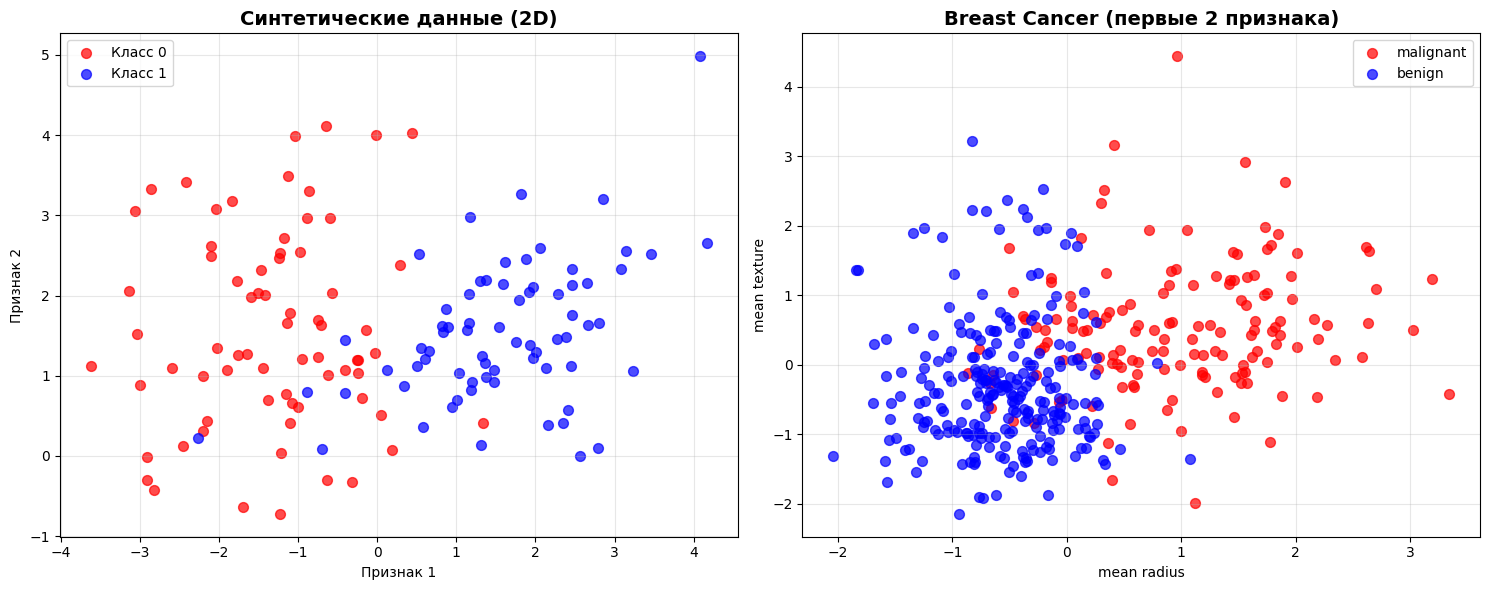

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Синтетические данные
colors = ["red", "blue"]
for i, color in enumerate(colors):
    mask = y_syn_train == i
    axes[0].scatter(
        X_syn_train[mask, 0],
        X_syn_train[mask, 1],
        c=color,
        alpha=0.7,
        label=f"Класс {i}",
        s=50,
    )
axes[0].set_title("Синтетические данные (2D)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Признак 1")
axes[0].set_ylabel("Признак 2")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Реальные данные - первые два признака для визуализации
for i, color in enumerate(colors):
    mask = y_real_train == i
    axes[1].scatter(
        X_real_train_scaled[mask, 0],
        X_real_train_scaled[mask, 1],
        c=color,
        alpha=0.7,
        label=breast_cancer.target_names[i],
        s=50,
    )
axes[1].set_title(
    "Breast Cancer (первые 2 признака)", fontsize=14, fontweight="bold"
)
axes[1].set_xlabel(breast_cancer.feature_names[0])
axes[1].set_ylabel(breast_cancer.feature_names[1])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Логистическая регрессия

**Задание:**

1. Реализуйте функцию `sigmoid` на Python, используя NumPy.
2. Визуализируйте функцию сигмоиды на интервале от -10 до 10.

_Подсказка: для избежания overflow используйте np.clip() при вычислении экспоненты._

In [8]:
def sigmoid(z):
    """
    sigmoid(z) = 1 / (1 + exp(-z))
    """
    return 1 / (
        1 + np.exp(-np.clip(z, -250, 250))
    )  # clip для избежания overflow

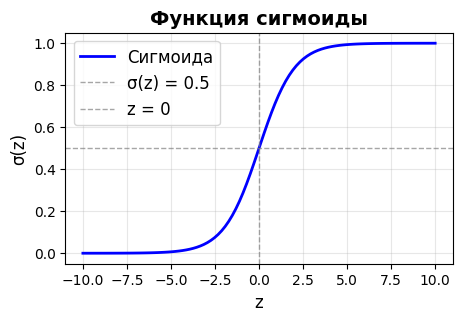

In [9]:
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

plt.figure(figsize=(5, 3))
plt.plot(z_values, sigmoid_values, label="Сигмоида", color="blue", linewidth=2)
plt.title("Функция сигмоиды", fontsize=14, fontweight="bold")
plt.xlabel("z", fontsize=12)
plt.ylabel("σ(z)", fontsize=12)
plt.axhline(
    0.5,
    color="gray",
    linestyle="--",
    linewidth=1,
    alpha=0.7,
    label="σ(z) = 0.5",
)
plt.axvline(
    0, color="gray", linestyle="--", linewidth=1, alpha=0.7, label="z = 0"
)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

**Задание:**

- Реализуйте функцию потерь `log_loss` для логистической регрессии.
- Реализуйте градиент функции потерь `gradient_log_loss`.

_Подсказка: чтобы избежать `log(0)`, клипируйте значения предсказаний в диапазоне [ε, 1-ε] перед вычислением потерь и градиента._

In [10]:
# Реализуем функцию потерь log-loss из теории
def log_loss(y_true, y_pred):
    """
    Log-loss (binary cross-entropy)
    L = -1/N * Σ[y*log(p) + (1-y)*log(1-p)]
    """
    # Избегаем log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Реализуем градиент log-loss из теории
def gradient_log_loss(X, y_true, y_pred):
    """
    Градиент log-loss по весам w
    ∇L = 1/N * X^T * (σ(z) - y)
    """
    n_samples = X.shape[0]
    return (1 / n_samples) * X.T @ (y_pred - y_true)

**Реализация градиентного спуска для логистической регрессии:**

In [11]:
# Простая реализация градиентного спуска
def gradient_descent_logistic(X, y, learning_rate=0.1, n_iterations=100):
    """
    Градиентный спуск для логистической регрессии
    """
    # Добавляем bias (столбец из единиц)
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    n_features = X_with_bias.shape[1]

    # Инициализируем веса случайно
    np.random.seed(42)
    weights = np.random.normal(0, 0.01, n_features)

    # Для отслеживания процесса обучения
    losses = []

    for i in range(n_iterations):
        # Прямой проход: вычисляем предсказания
        z = X_with_bias @ weights
        predictions = sigmoid(z)

        # Вычисляем потери
        loss = log_loss(y, predictions)
        losses.append(loss)

        # Вычисляем градиент
        gradient = gradient_log_loss(X_with_bias, y, predictions)

        # Обновляем веса
        weights -= learning_rate * gradient

        # Выводим прогресс каждые 20 итераций
        if (i + 1) % 20 == 0:
            print(f"Итерация {i + 1}: Loss = {loss:.4f}")

    return weights, losses

### Обучение логистической регрессии на синтетических данных

In [12]:
weights, losses = gradient_descent_logistic(
    X_syn_train, y_syn_train, learning_rate=0.1, n_iterations=100
)

print(f"\nОбучение завершено!")
print(f"Финальные веса: {weights}")
print(f"Финальное значение функции потерь: {losses[-1]:.4f}")

Итерация 20: Loss = 0.3386
Итерация 40: Loss = 0.2748
Итерация 60: Loss = 0.2503
Итерация 80: Loss = 0.2376
Итерация 100: Loss = 0.2301

Обучение завершено!
Финальные веса: [ 0.0253588   1.63917751 -0.18462334]
Финальное значение функции потерь: 0.2301


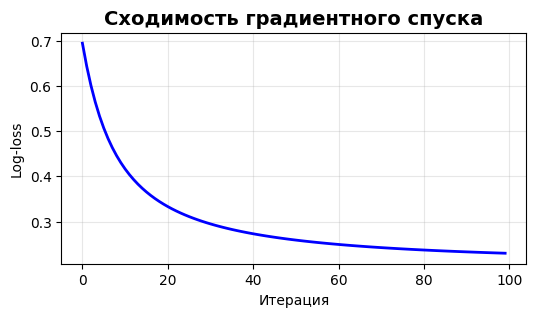

In [13]:
plt.figure(figsize=(6, 3))
plt.plot(losses, "b-", linewidth=2)
plt.title("Сходимость градиентного спуска", fontsize=14, fontweight="bold")
plt.xlabel("Итерация")
plt.ylabel("Log-loss")
plt.grid(True, alpha=0.3)
plt.show()

### Визуализация границы решения

In [14]:
# Создаем простую модель для визуализации границы решения
class SimpleLogisticRegression:
    def __init__(self, weights):
        self.weights = weights

    def predict(self, X):
        # Добавляем bias
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        z = X_with_bias @ self.weights
        probabilities = sigmoid(z)
        return (probabilities >= 0.5).astype(int)

    def predict_proba(self, X):
        # Добавляем bias
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        z = X_with_bias @ self.weights
        return sigmoid(z)


def plot_decision_boundary(X, y, model, title="Граница решения", ax=None):
    """
    Визуализирует границу решения модели на 2D данных
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Создаем сетку точек
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказываем для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Рисуем границу решения
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Рисуем точки данных
    colors = ["red", "blue"]
    for i, color in enumerate(colors):
        mask = y == i
        ax.scatter(
            X[mask, 0],
            X[mask, 1],
            c=color,
            alpha=0.8,
            label=f"Класс {i}",
            s=60,
            edgecolors="black",
            linewidth=0.5,
        )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Признак 1")
    ax.set_ylabel("Признак 2")
    ax.legend()
    ax.grid(True, alpha=0.3)

    return ax


# Создаем модель с нашими весами
our_model = SimpleLogisticRegression(weights)

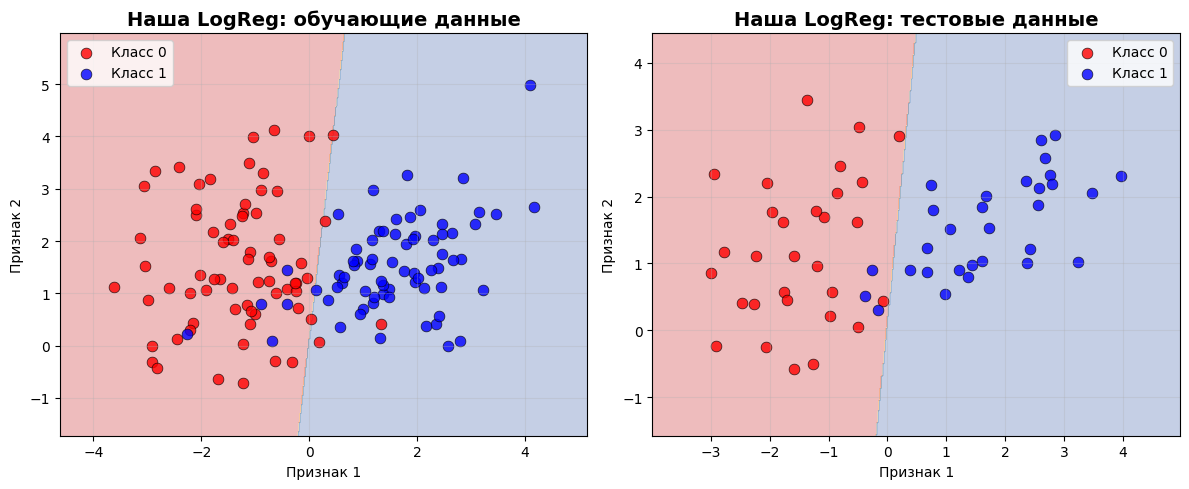

In [15]:
plt.figure(figsize=(12, 5))

# Граница решения на обучающих данных
plt.subplot(1, 2, 1)
plot_decision_boundary(
    X_syn_train,
    y_syn_train,
    our_model,
    "Наша LogReg: обучающие данные",
    plt.gca(),
)

# Граница решения на тестовых данных
plt.subplot(1, 2, 2)
plot_decision_boundary(
    X_syn_test, y_syn_test, our_model, "Наша LogReg: тестовые данные", plt.gca()
)

plt.tight_layout()
plt.show()

### Метрика Accuracy

**Задача:** посчитайте accuracy модели на обучающей и тестовой выборках.

In [16]:
train_predictions = our_model.predict(X_syn_train)
test_predictions = our_model.predict(X_syn_test)

train_accuracy = np.mean(train_predictions == y_syn_train)
test_accuracy = np.mean(test_predictions == y_syn_test)

print(f"Accuracy на обучающей выборке: {train_accuracy:.4f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")

Accuracy на обучающей выборке: 0.9429
Accuracy на тестовой выборке: 0.9500


### Sklearn реализация логистической регрессии

**Задача:**

Обучите логистическую регрессию на синтетических данных с помощью `LogisticRegression` из `sklearn`.


In [17]:
sklearn_model = LogisticRegression(random_state=42, max_iter=100)
sklearn_model.fit(X_syn_train, y_syn_train)

# Сравниваем результаты
print("=== Сравнение моделей ===")
print(
    f"Наша реализация - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}"
)

sklearn_train_acc = sklearn_model.score(X_syn_train, y_syn_train)
sklearn_test_acc = sklearn_model.score(X_syn_test, y_syn_test)
print(
    f"Sklearn модель  - Train Accuracy: {sklearn_train_acc:.4f}, Test Accuracy: {sklearn_test_acc:.4f}"
)

=== Сравнение моделей ===
Наша реализация - Train Accuracy: 0.9429, Test Accuracy: 0.9500
Sklearn модель  - Train Accuracy: 0.9429, Test Accuracy: 0.9333


### Сравнение границ решения

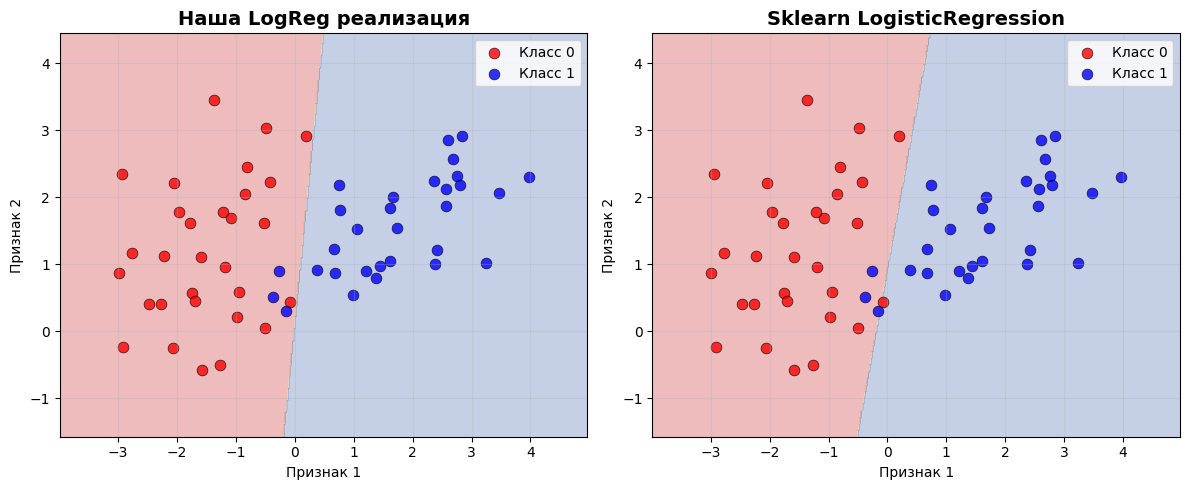

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Наша реализация
plot_decision_boundary(
    X_syn_test, y_syn_test, our_model, "Наша LogReg реализация", axes[0]
)

# Sklearn реализация
plot_decision_boundary(
    X_syn_test, y_syn_test, sklearn_model, "Sklearn LogisticRegression", axes[1]
)

plt.tight_layout()
plt.show()

### L2-регуляризация

В логистической регрессии функция потерь с L2-регуляризацией имеет вид:

$$
  \mathcal L(\mathbf w) = - \frac{1}{N} \sum_{i=1}^N \left( y^{(i)} \log(\sigma(z^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(z^{(i)})) \right)
  \;+\;\frac{\lambda}{2}\|\mathbf w\|_2^2,
$$

где 
- $\|\mathbf w\|_2^2 = \sum_{j=1}^d w_j^2$ — сумма квадратов коэффициентов, 
- $\lambda$ — коэффициент регуляризации.

Параметр $\lambda$ управляет штрафом за большие веса:
- Большое $\lambda$ → сильная регуляризация → веса ближе к нулю → снижается variance (меньше переобучение), но может вырасти bias.
- Малое $\lambda$ → слабая регуляризация → модель гибче, но выше риск переобучения.

В sklearn параметр `C` задаётся обратно $\lambda$:  
$$
C = \frac{1}{\lambda}
$$

Следовательно,
- Большое `C` → слабая регуляризация (модель может переобучиться)
- Малое `C` → сильная регуляризация (модель более "сдержанная")


#### Влияние регуляризации на реальных данных (Breast Cancer)

In [19]:
C_values = [0.01, 1.0, 100.0]
models = {}
results = {}

for C in C_values:
    # Обучаем модель
    model = LogisticRegression(C=C, random_state=42, max_iter=1000)
    model.fit(X_real_train_scaled, y_real_train)

    # Сохраняем модель
    models[C] = model

    # Считаем метрики
    train_acc = model.score(X_real_train_scaled, y_real_train)
    test_acc = model.score(X_real_test_scaled, y_real_test)

    results[C] = {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "coefficients": model.coef_[0],
        "n_features": len(model.coef_[0]),
    }

    print(
        f"C = {C:6.2f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f} | "
        + f"Max |coef|: {np.max(np.abs(model.coef_[0])):.4f}"
    )

C =   0.01 | Train Acc: 0.9598 | Test Acc: 0.9415 | Max |coef|: 0.2319
C =   1.00 | Train Acc: 0.9874 | Test Acc: 0.9883 | Max |coef|: 1.2263
C = 100.00 | Train Acc: 0.9950 | Test Acc: 0.9532 | Max |coef|: 13.3950


### Визуализация влияния регуляризации на веса

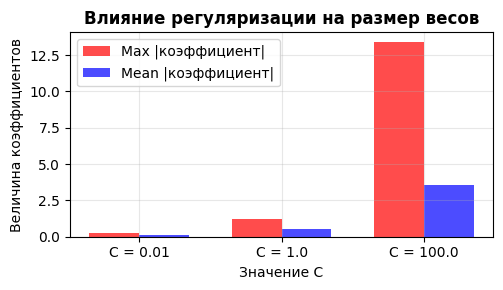

In [20]:
fig, ax = plt.subplots(figsize=(5, 3))

C_labels = [f"C = {C}" for C in C_values]
max_coefs = [np.max(np.abs(results[C]["coefficients"])) for C in C_values]
mean_coefs = [np.mean(np.abs(results[C]["coefficients"])) for C in C_values]

x_pos = np.arange(len(C_values))
width = 0.35

ax.bar(
    x_pos - width / 2,
    max_coefs,
    width,
    label="Max |коэффициент|",
    color="red",
    alpha=0.7,
)
ax.bar(
    x_pos + width / 2,
    mean_coefs,
    width,
    label="Mean |коэффициент|",
    color="blue",
    alpha=0.7,
)

ax.set_xlabel("Значение C")
ax.set_ylabel("Величина коэффициентов")
ax.set_title("Влияние регуляризации на размер весов", fontweight="bold")
ax.set_xticks(x_pos)
ax.set_xticklabels(C_labels)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## SVM

### Sklearn реализация SVM

**Задача:**

Обучите SVM на синтетических данных с помощью `LinearSVC` из `sklearn`.

_Важно: помните, что SVM использует метки классов {-1, +1} вместо {0, 1} - необходимо преобразовать метки перед обучением._

In [21]:
# Преобразуем метки для SVM: {0, 1} → {-1, +1}
y_syn_train_svm = 2 * y_syn_train - 1  # 0→-1, 1→+1
y_syn_test_svm = 2 * y_syn_test - 1

# Обучаем Linear SVM с C=1.0 (умеренная регуляризация)
svm_model = LinearSVC(C=1.0, random_state=42, max_iter=1000)
svm_model.fit(X_syn_train, y_syn_train_svm)

# Проверяем качество
train_acc_svm = svm_model.score(X_syn_train, y_syn_train_svm)
test_acc_svm = svm_model.score(X_syn_test, y_syn_test_svm)

print(f"Train Accuracy: {train_acc_svm:.4f}")
print(f"Test Accuracy: {test_acc_svm:.4f}")
print(f"Веса модели: {svm_model.coef_[0]}")
print(f"Bias (intercept): {svm_model.intercept_[0]:.4f}")

Train Accuracy: 0.9429
Test Accuracy: 0.9333
Веса модели: [ 0.73414612 -0.15405395]
Bias (intercept): 0.1438


### Визуализация границы решения

In [22]:
def plot_svm_decision_boundary(
    X, y, svm_model, title="SVM граница решения", ax=None
):
    """
    Визуализирует границу решения SVM с margin'ами
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Создаем сетку точек
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получаем decision function для сетки
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Рисуем контуры: границу решения и margin'ы
    ax.contour(
        xx,
        yy,
        Z,
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        colors=["red", "black", "red"],
        linewidths=[2, 3, 2],
    )

    # Раскрашиваем области
    ax.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Рисуем точки данных
    colors = ["red", "blue"]
    for i, color in enumerate(colors):
        # Преобразуем метки обратно для визуализации
        y_viz = (y + 1) // 2  # -1→0, +1→1
        mask = y_viz == i
        ax.scatter(
            X[mask, 0],
            X[mask, 1],
            c=color,
            alpha=0.8,
            label=f"Класс {i}",
            s=60,
            edgecolors="black",
            linewidth=0.5,
        )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Признак 1")
    ax.set_ylabel("Признак 2")
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Добавляем пояснения
    ax.text(
        0.02,
        0.98,
        "Черная линия: граница решения\nКрасные пунктиры: margin границы",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    return ax

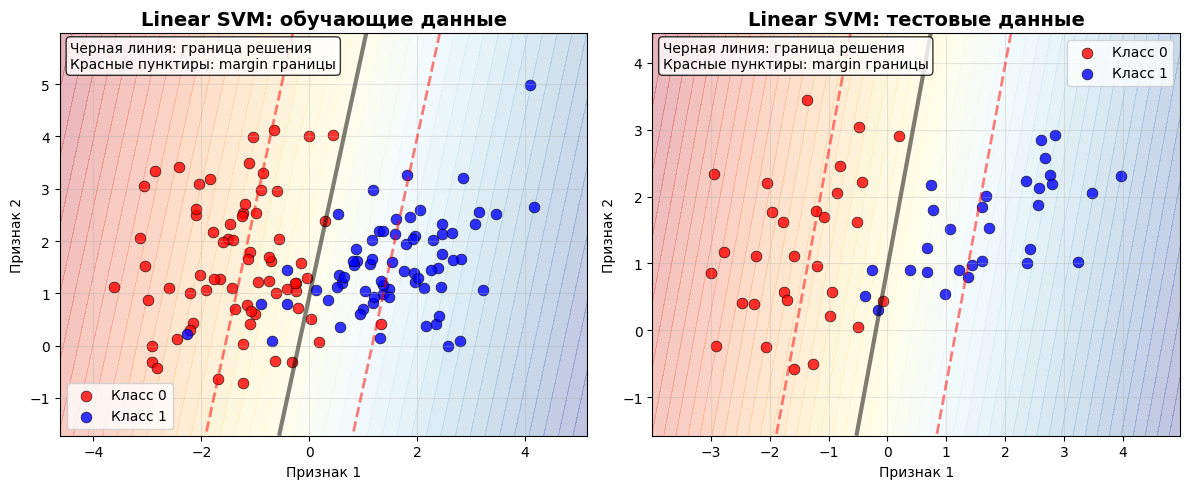

In [23]:
plt.figure(figsize=(12, 5))

# SVM на обучающих данных
plt.subplot(1, 2, 1)
plot_svm_decision_boundary(
    X_syn_train,
    y_syn_train_svm,
    svm_model,
    "Linear SVM: обучающие данные",
    plt.gca(),
)

# SVM на тестовых данных
plt.subplot(1, 2, 2)
plot_svm_decision_boundary(
    X_syn_test,
    y_syn_test_svm,
    svm_model,
    "Linear SVM: тестовые данные",
    plt.gca(),
)

plt.tight_layout()
plt.show()

### Влияние параметра C в SVM

Параметр `C` в SVM контролирует компромисс между максимизацией отступа и минимизацией ошибок классификации:

- Маленькое `C` → широкий отступ, больше ошибок допустимо
- Большое `C` → узкий отступ, меньше ошибок допустимо


#### Влияние регуляризации на реальных данных (Breast Cancer)

In [24]:
C_values_svm = [0.01, 1.0, 100.0]
svm_models = {}

for C in C_values_svm:
    y_real_train_svm = 2 * y_real_train - 1  # 0→-1, 1→+1
    y_real_test_svm = 2 * y_real_test - 1
    model = LinearSVC(C=C, random_state=42, max_iter=2000)
    model.fit(X_real_train_scaled, y_real_train_svm)
    svm_models[C] = model

    # Считаем метрики
    train_acc = model.score(X_real_train_scaled, y_real_train_svm)
    test_acc = model.score(X_real_test_scaled, y_real_test_svm)

    # Величина весов (связана с шириной отступа)
    weight_norm = np.linalg.norm(model.coef_[0])

    print(
        f"C = {C:4.1f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f} | "
        + f"||w||: {weight_norm:.4f}"
    )

C =  0.0 | Train Acc: 0.9849 | Test Acc: 0.9825 | ||w||: 0.5768
C =  1.0 | Train Acc: 0.9899 | Test Acc: 0.9649 | ||w||: 2.9300
C = 100.0 | Train Acc: 1.0000 | Test Acc: 0.9474 | ||w||: 20.1570


## Сравнение и выводы

Теперь проведем сравнение LogReg и SVM на одних и тех же данных с оптимальными гиперпараметрами.

In [25]:
final_logreg = LogisticRegression(C=1.0, random_state=42, max_iter=1000)
final_logreg.fit(X_real_train_scaled, y_real_train)

final_svm = LinearSVC(C=1.0, random_state=42, max_iter=1000)
final_svm.fit(X_real_train_scaled, y_real_train)

print(
    f"LogReg: coeffs = {final_logreg.coef_[0]}, bias = {final_logreg.intercept_[0]:.4f}"
)
print(
    f"SVM: coeffs = {final_svm.coef_[0]}, bias = {final_svm.intercept_[0]:.4f}"
)

LogReg: coeffs = [-0.49499939 -0.45979525 -0.45978281 -0.54984048 -0.1672432   0.65265465
 -0.53260146 -0.63065394 -0.11381252  0.03618538 -0.88637017  0.36776094
 -0.20498755 -0.93749327 -0.18501794  0.5687022   0.16374479 -0.26820006
  0.32489383  0.34955732 -0.94105951 -1.22632911 -0.73104215 -0.95495624
 -0.7489706   0.03592003 -0.78598887 -0.99680696 -0.86944423 -0.16426367], bias = 0.2146
SVM: coeffs = [ 0.05864802 -0.1297572   0.05298498 -0.08668497 -0.11598782  1.37759573
 -0.34716934 -0.31663449 -0.14069517 -0.70321429 -0.75056522  0.2903428
  0.40724193 -1.10621371 -0.06711243 -0.07533831  0.71826164 -0.48387585
  0.28525982  0.09985761 -0.59573109 -0.69723163 -0.33965363 -0.97176857
 -0.17750522  0.04162818 -0.8761982  -0.36131556 -0.41571621  0.12022795], bias = -0.2718


### Сравнение метрик качества

#### Accuracy, Precision, Recall, F1

In [26]:
logreg_pred = final_logreg.predict(X_real_test_scaled)
svm_pred = final_svm.predict(X_real_test_scaled)


def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
    }


# Собираем результаты
logreg_metrics = calculate_metrics(
    y_real_test, logreg_pred, "Logistic Regression"
)
svm_metrics = calculate_metrics(y_real_test, svm_pred, "Linear SVM")

# Красивая таблица результатов
print("СРАВНЕНИЕ МЕТРИК КАЧЕСТВА")
print("=" * 70)
print(
    f"{'Модель':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}"
)
print("-" * 70)

for metrics in [logreg_metrics, svm_metrics]:
    print(
        f"{metrics['Model']:<20} {metrics['Accuracy']:<10.4f} {metrics['Precision']:<10.4f} "
        + f"{metrics['Recall']:<10.4f} {metrics['F1-score']:<10.4f}"
    )

print("=" * 70)

СРАВНЕНИЕ МЕТРИК КАЧЕСТВА
Модель               Accuracy   Precision  Recall     F1-score  
----------------------------------------------------------------------
Logistic Regression  0.9883     0.9907     0.9907     0.9907    
Linear SVM           0.9649     0.9633     0.9813     0.9722    


#### Confusion matrices

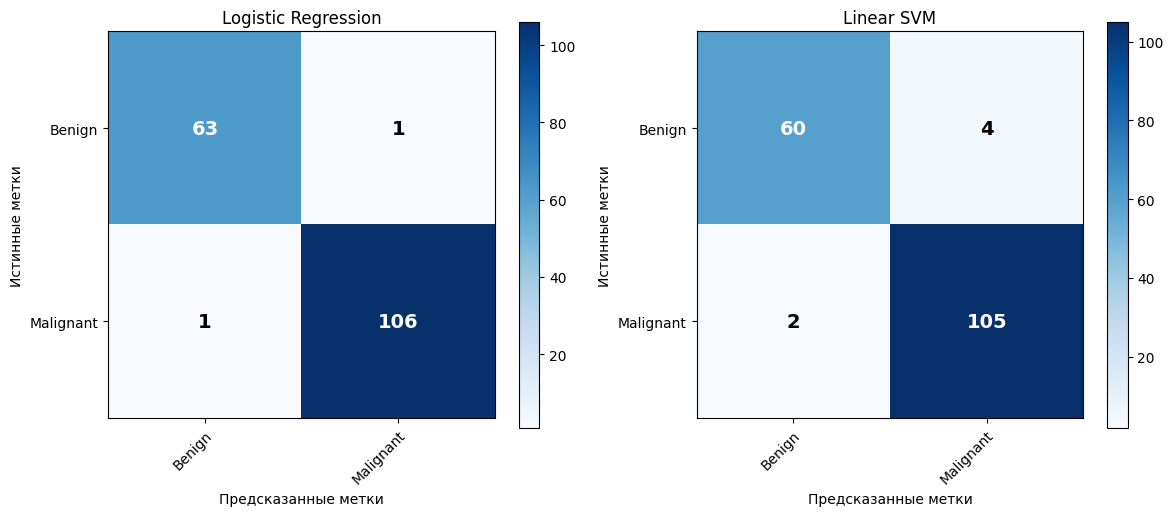

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)

    # Создаем тепловую карту
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Подписи
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=["Benign", "Malignant"],
        yticklabels=["Benign", "Malignant"],
        title=f"{model_name}",
        ylabel="Истинные метки",
        xlabel="Предсказанные метки",
    )

    # Поворачиваем подписи
    plt.setp(
        ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
    )

    # Добавляем числа в ячейки
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], "d"),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=14,
                fontweight="bold",
            )


# Строим confusion matrices
plot_confusion_matrix(y_real_test, logreg_pred, "Logistic Regression", axes[0])
plot_confusion_matrix(y_real_test, svm_pred, "Linear SVM", axes[1])

plt.tight_layout()
plt.show()

### Интерпретация результатов

#### Логистическая регрессия

Важным преимуществом логистической регрессии является ее интерпретируемость: мы можем легко понять, как каждый признак влияет на вероятность принадлежности к классу `1` (доброкачественные опухоли).

In [28]:
logreg_coef = final_logreg.coef_[0]
importance = np.abs(logreg_coef)
top_indices = np.argsort(importance)[-5:][::-1]

print("Топ-5 признаков по влиянию на предсказание:")
for rank, idx in enumerate(top_indices, 1):
    coef = logreg_coef[idx]
    feature = breast_cancer.feature_names[idx]
    odds_ratio = np.exp(coef)
    if odds_ratio >= 1:
        description = f"увеличивает шансы на доброкачественную опухоль в {odds_ratio:.3f} раза"
    else:
        description = f"уменьшает шансы на доброкачественную опухоль в {1 / odds_ratio:.3f} раза"
    print(f"{rank}. {feature:<20} | coef: {coef:+.3f} | {description}")

Топ-5 признаков по влиянию на предсказание:
1. worst texture        | coef: -1.226 | уменьшает шансы на доброкачественную опухоль в 3.409 раза
2. worst concave points | coef: -0.997 | уменьшает шансы на доброкачественную опухоль в 2.710 раза
3. worst area           | coef: -0.955 | уменьшает шансы на доброкачественную опухоль в 2.599 раза
4. worst radius         | coef: -0.941 | уменьшает шансы на доброкачественную опухоль в 2.563 раза
5. area error           | coef: -0.937 | уменьшает шансы на доброкачественную опухоль в 2.554 раза


#### SVM

In [29]:
svm_coef = final_svm.coef_[0]
svm_feature_importance = np.abs(svm_coef)
svm_top_indices = np.argsort(svm_feature_importance)[-5:][::-1]

print("Топ-5 важных признаков:")
for rank, idx in enumerate(svm_top_indices, 1):
    coef = svm_coef[idx]
    feature = breast_cancer.feature_names[idx]
    if coef > 0:
        direction = "увеличивает вероятность доброкачественной опухоли (1)"
    else:
        direction = "увеличивает вероятность злокачественной опухоли (0)"
    print(f"{rank}. {feature:<20} | " + f"вес: {coef:+.3f} | {direction}")

Топ-5 важных признаков:
1. mean compactness     | вес: +1.378 | увеличивает вероятность доброкачественной опухоли (1)
2. area error           | вес: -1.106 | увеличивает вероятность злокачественной опухоли (0)
3. worst area           | вес: -0.972 | увеличивает вероятность злокачественной опухоли (0)
4. worst concavity      | вес: -0.876 | увеличивает вероятность злокачественной опухоли (0)
5. radius error         | вес: -0.751 | увеличивает вероятность злокачественной опухоли (0)


### Практический пример

In [30]:
# Берем первого пациента из тестовой выборки
patient_data = X_real_test_scaled[0:1]
true_label = y_real_test[0]
true_diagnosis = breast_cancer.target_names[true_label]

print(f"Пациент: истинный диагноз = {true_diagnosis}")

# Логистическая регрессия - с вероятностями
logreg_proba = final_logreg.predict_proba(patient_data)[0]
logreg_pred_single = final_logreg.predict(patient_data)[0]

print(f"\nLogistic Regression результат:")
print(f"   • Вероятность злокачественной опухоли: {logreg_proba[0] * 100:.1f}%")
print(
    f"   • Вероятность доброкачественной опухоли: {logreg_proba[1] * 100:.1f}%"
)
print(f"   • Предсказание: {breast_cancer.target_names[logreg_pred_single]}")

# SVM - только классы
svm_pred_single = final_svm.predict(patient_data)[0]
svm_decision = final_svm.decision_function(patient_data)[0]

print(f"\n SVM результат:")
print(f"   • Предсказание: {breast_cancer.target_names[svm_pred_single]}")
print(f"   • Расстояние до границы: {abs(svm_decision):.3f}")

Пациент: истинный диагноз = malignant

Logistic Regression результат:
   • Вероятность злокачественной опухоли: 96.8%
   • Вероятность доброкачественной опухоли: 3.2%
   • Предсказание: malignant

 SVM результат:
   • Предсказание: malignant
   • Расстояние до границы: 1.023


### Выводы

**📊 По метрикам качества:**
- На данных breast cancer оба метода показывают **отличное качество** (accuracy > 95%)
- Различия в precision, recall, F1-score **минимальны**
- Выбор модели определяется **не качеством, а другими факторами**

**🔍 По интерпретируемости:**

| Аспект | Logistic Regression | Linear SVM |
|--------|---------------------|------------|
| **Вероятности** | ✅ predict_proba() | ❌ Только классы |
| **Интерпретация коэф.** | ✅ Odds ratios | ⚠️ Направление влияния |
| **Медицинское применение** | ✅ "85% риск malignant" | ❌ "Класс malignant" |
| **Объяснение пациенту** | ✅ Легко | ❌ Сложно |


---

## 🏁 Резюме урока

**Что мы изучили:**

1. **📚 Теория:** 
   - Логистическая регрессия: сигмоида, log-loss, максимизация likelihood
   - SVM: максимизация margin, soft-margin, роль параметра C

2. **💻 Практика:**
   - Реализация градиентного спуска с нуля
   - Sklearn: LogisticRegression и LinearSVC
   - Влияние регуляризации на качество моделей

3. **🔍 Сравнение:**
   - Метрики качества: accuracy, precision, recall, F1-score
   - Интерпретируемость: вероятности vs классы
   - Практические рекомендации по выбору
